# Figure 3
INP concentrations, normalised by the number, surface area and volume of aerosol > 100 nm.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

In [2]:
INP_concentrations = pd.read_csv('/home/users/erinraif/acao_data/inp_data/INP_concentrations.csv', index_col='temp_bin')
nX_data = pd.read_csv('/home/users/erinraif/acao_data/inp_data/INP_normalised_by_aerosol.csv',index_col='temp_bin')
leg_types = pd.read_csv('/home/users/erinraif/acao_data/metadata/filter_leg_types.csv',
                        index_col='unique_ID')
suffixes = ['nN','nS','nV']

In [3]:
mosaic = [['INP_ax','INP_ax','nN_ax','nN_ax'],
          ['INP_ax','INP_ax','nN_ax','nN_ax'],
          ['nS_ax','nS_ax','nV_ax','nV_ax'],
          ['nS_ax','nS_ax','nV_ax','nV_ax'],
          ['dummy','dummy','dummy','dummy']]

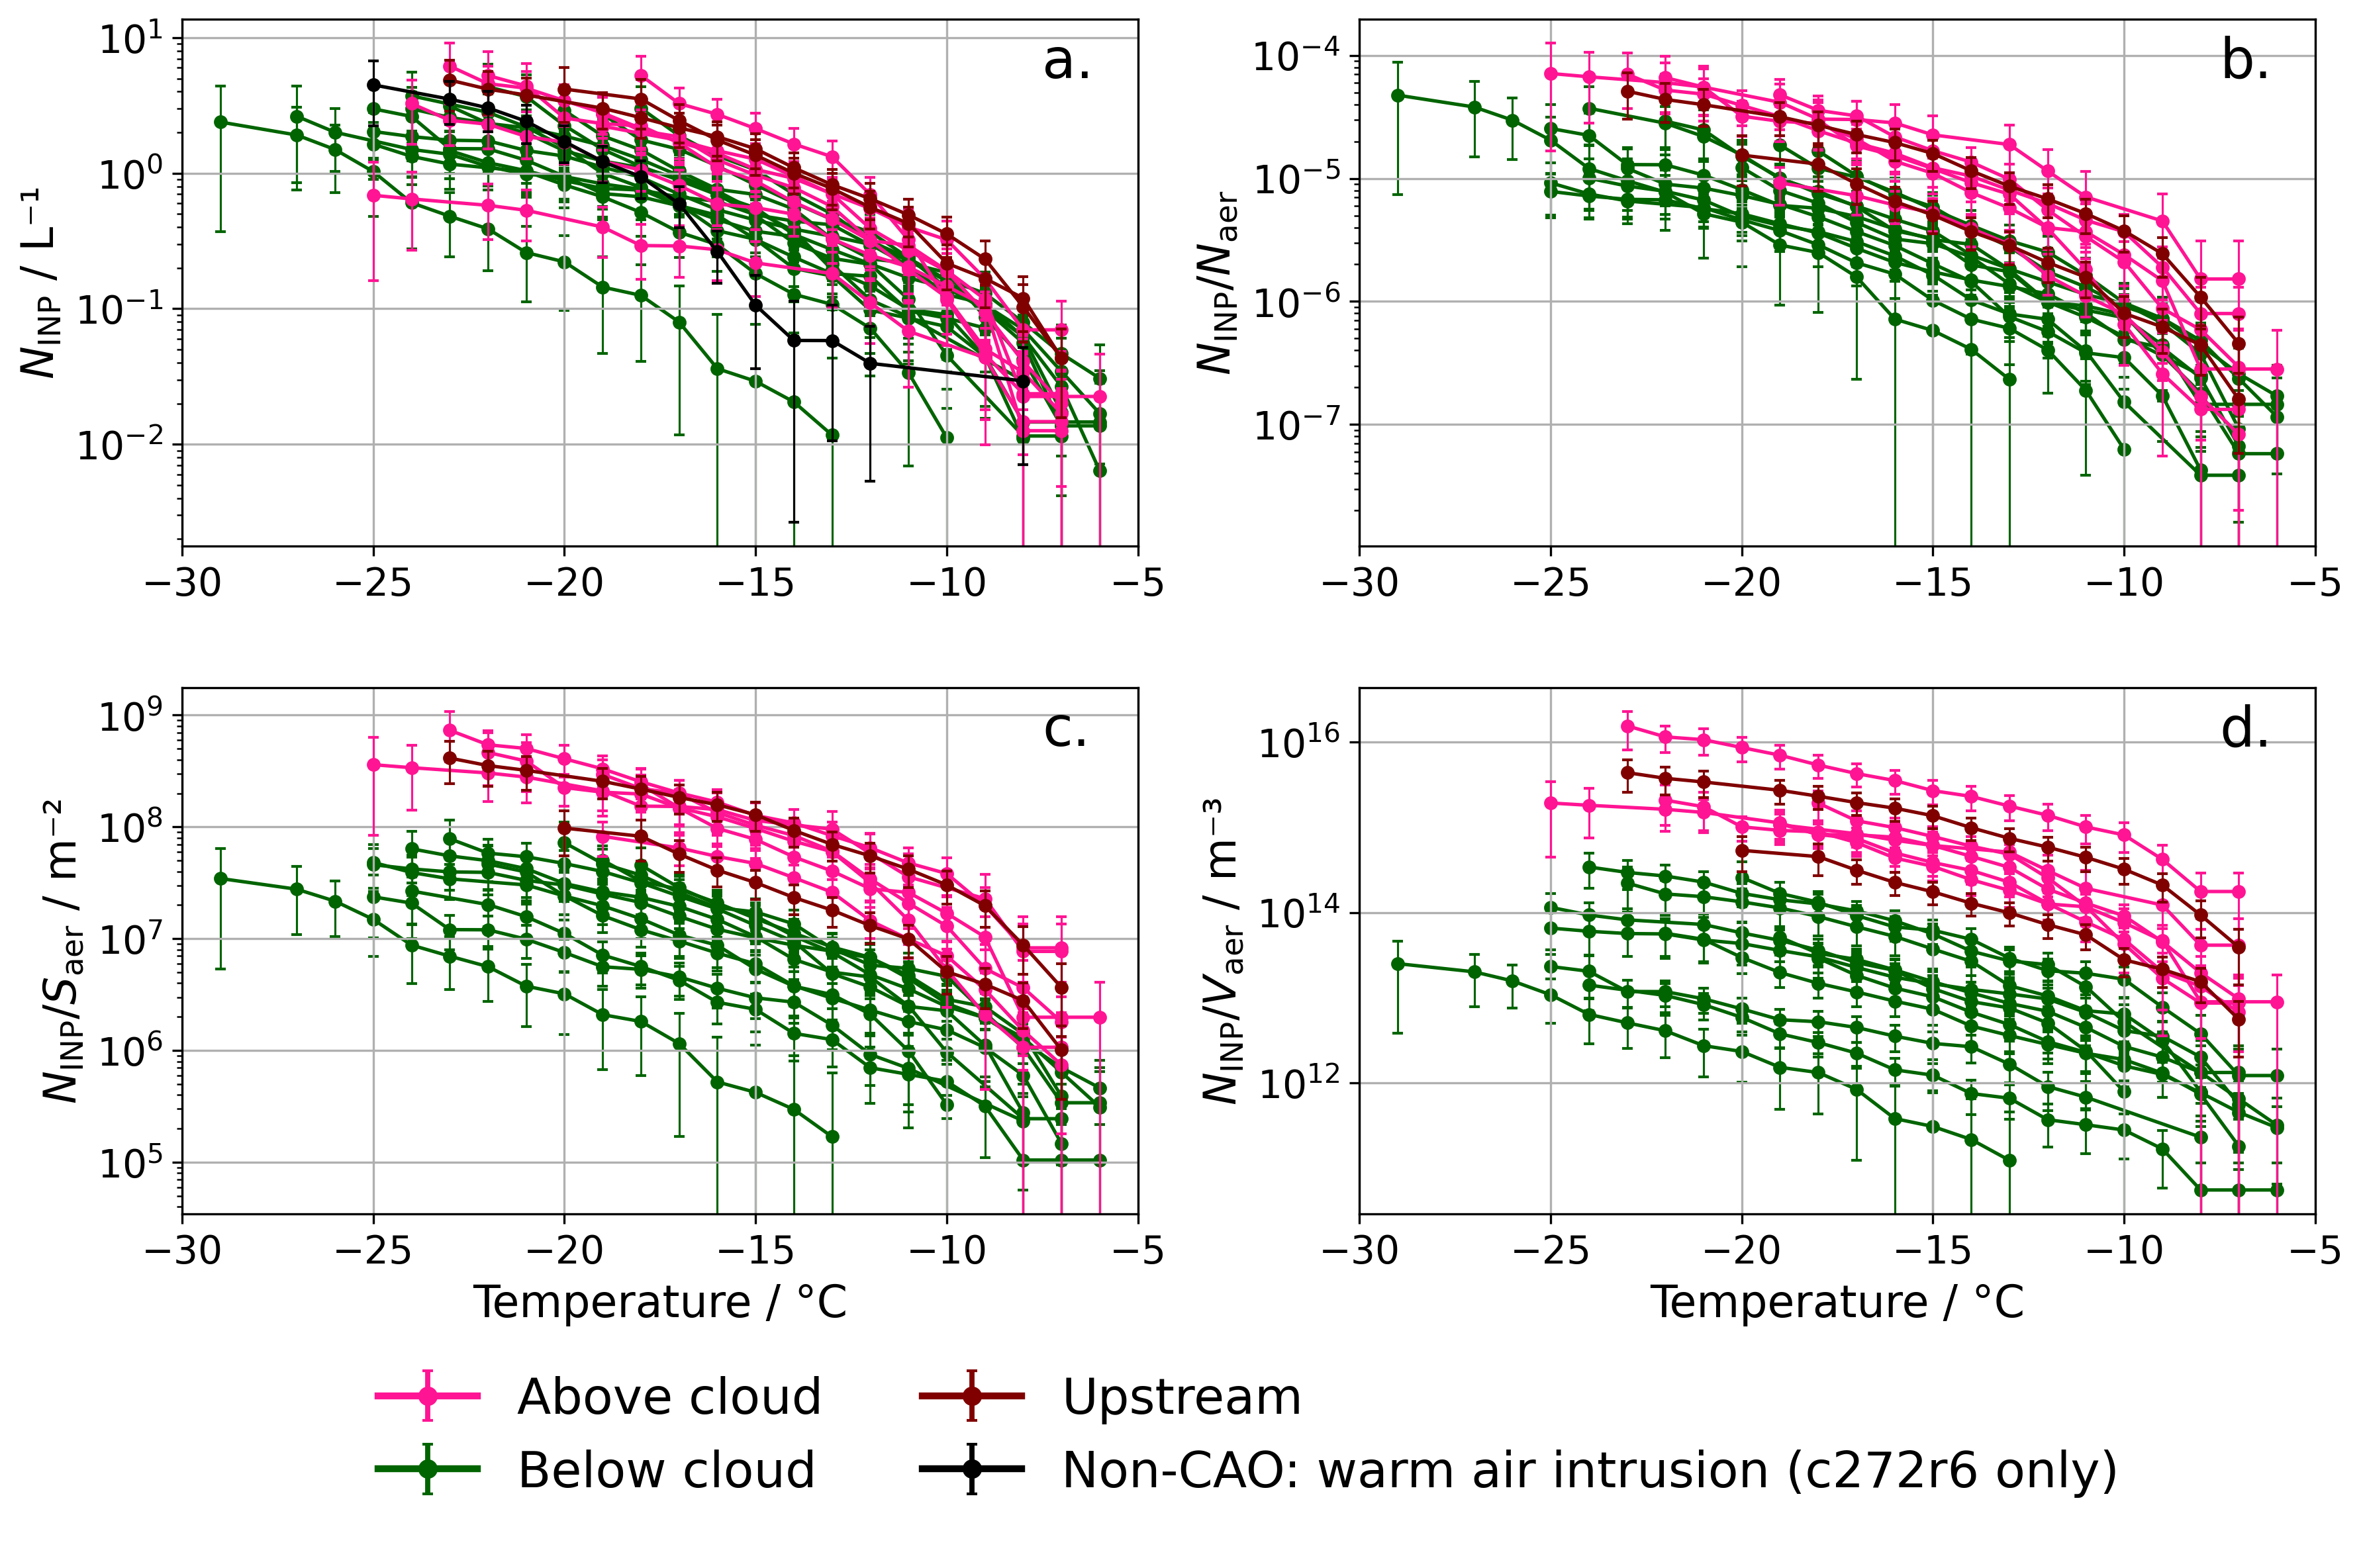

In [4]:
fig, axes = plt.subplot_mosaic(mosaic,figsize=(12,8),dpi=300)
for ax in axes:
    axes[ax].set_xlim(-30,-5)
    axes[ax].set_yscale('log')
    axes[ax].grid()
    axes[ax].tick_params(axis='x', labelsize=14) 
    axes[ax].tick_params(axis='y', labelsize=14)
axes['dummy'].set_yscale('linear')

# Loop through each filter run, choose colour appropriately and plot
ls = '-'
m = 'o'
ms = 4
for col in [col for col in INP_concentrations.columns if col.endswith('NT')]:
    y = INP_concentrations[col]
    y_err = INP_concentrations[col[:-2] + 'err']
    # Choose colour based on location
    if leg_types.loc[col[:-3]]['type'] == 'below':
        c = 'darkgreen'
        z = 1
    elif leg_types.loc[col[:-3]]['type'] == 'above':
        c = 'deeppink'
        z = 2
    elif leg_types.loc[col[:-3]]['type'] == 'upstream':
        c = 'maroon'
        z = 3
    if col[:4] == 'c272':
        c = 'black'
        z = 4
    # Plot INP concentrations
    axes['INP_ax'].errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker=m,
        linestyle=ls, markersize=ms, capsize=2, elinewidth=0.75,
        linewidth=1.25, color=c, zorder=z)
    # Plot INP concentrations normalised by aerosol property
    for (ax,s) in zip([axes['nN_ax'],axes['nS_ax'],axes['nV_ax']],suffixes):
        if col > 'c273':
            y = nX_data[col[:-2] + s]                
            y_errs = nX_data[col[:-2] + s + '_err']
            ax.errorbar(y.dropna().index, y.dropna(), y_errs.dropna(),marker=m,
                linestyle=ls, markersize=ms, capsize=2, elinewidth=0.75,
                linewidth=1.25, color=c, zorder=z)
# Create items on dummy axis for the legend.
axes['dummy'].errorbar([0],[0], [0.5],marker=m,
        linestyle=ls, markersize=ms*1.5, capsize=2, elinewidth=0.75*2.5,
        linewidth=1.25*2, color='deeppink', label='Above cloud')
axes['dummy'].errorbar([0],[0], [0.5],marker=m,
        linestyle=ls, markersize=ms*1.5, capsize=2, elinewidth=0.75*2.5,
        linewidth=1.25*2, color='darkgreen', label='Below cloud')
axes['dummy'].errorbar([0],[0], [0.5],marker=m,
        linestyle=ls, markersize=ms*1.5, capsize=2, elinewidth=0.75*2.5,
        linewidth=1.25*2, color='maroon', label='Upstream')
axes['dummy'].errorbar([0],[0], [0.5],marker=m,
        linestyle=ls, markersize=ms*1.5, capsize=2, elinewidth=0.75*2.5,
        linewidth=1.25*2, color='black', label='Non-CAO: warm air intrusion (c272r6 only)')

# Set axes labels
axes['INP_ax'].set_ylabel(r'$N_\mathrm{INP}$ / L⁻¹', size=16)
axes['nN_ax'].set_ylabel('$N_\mathrm{INP}/N_\mathrm{aer}$',fontsize=16)
axes['nS_ax'].set_ylabel('$N_\mathrm{INP}/S_\mathrm{aer}$ / m⁻²',fontsize=16)
axes['nV_ax'].set_ylabel('$N_\mathrm{INP}/V_\mathrm{aer}$ / m⁻³',fontsize=16)
axes['nS_ax'].set_xlabel('Temperature / °C', fontsize=16)
axes['nV_ax'].set_xlabel('Temperature / °C', fontsize=16)   

# Turn dummy axes visibility off and add legend
axes['dummy'].spines['top'].set_visible(False)
axes['dummy'].spines['right'].set_visible(False)
axes['dummy'].spines['bottom'].set_visible(False)
axes['dummy'].spines['left'].set_visible(False)
axes['dummy'].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False)
axes['dummy'].grid(False)
axes['dummy'].set_xlim(1,2)
axes['dummy'].set_ylim(1,2)
axes['dummy'].legend(ncols=2, fontsize=18,loc='upper center',frameon=False,borderaxespad=0)

# Add sub-figure labels
axes['INP_ax'].text(0.90, 0.97, 'a.', ha='left', va='top', fontsize=20,
           transform=axes['INP_ax'].transAxes)
axes['nN_ax'].text(0.90, 0.97, 'b.', ha='left', va='top', fontsize=20,
           transform=axes['nN_ax'].transAxes)
axes['nS_ax'].text(0.90, 0.97, 'c.', ha='left', va='top', fontsize=20,
           transform=axes['nS_ax'].transAxes)
axes['nV_ax'].text(0.90, 0.97, 'd.', ha='left', va='top', fontsize=20,
           transform=axes['nV_ax'].transAxes)

fig.tight_layout()
fig.savefig('./imgs/f03.pdf', transparent=True)
